In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import altair as alt
import seaborn as sns
import functions

# Import Data

In [2]:
a1 = pd.read_csv('data/csv/dgat/a1_pmol.csv')
a1.head()

,Unnamed: 0,feature,class,86,94,110,112,117,Control,73,...,248,249,255,257,Lrig1-D3,Lrig-D3 vs. CON,Lrig-D3 vs. CON.1,ALI,Lipid,Unnamed: 35
0,NaN,fullname,NaN,VilERT-G519R-86,VilERT-G519R-94,VilERT-G519R-110,VilERT-G519R-112,VilERT-G519R-117,NaN,VilERT-M5B-73,...,Lrig1-M5B-248,Lrig1-M5B-249,Lrig1-M5B-255,Lrig1-M5B-257,NaN,NaN,NaN,H655ALI,H655Lipid,H655
1,No.,cohort,NaN,Control,Control,Control,Control,Control,Average,iKO,...,Lrig1-D3,Lrig1-D3,Lrig1-D3,Lrig1-D3,Average,"Fold change (log, base 2)",P-value,DGAT-ALI,DGAT-Lipid,"Fold change (log, base 2)"
2,1,CE 13:0;0,CE,NaN,NaN,NaN,NaN,NaN,0,NaN,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2,CE 16:0;0,CE,55.57350159,30.77109909,18.34740067,10.03540039,19.29459953,26.80440025,70.8144989,...,19.11630058,15.30920029,37.17850113,12.49040031,21.02360058,-0.4,0.59,5.813129902,4.17456007,-0.5
4,3,CE 16:1;0,CE,7.007959843,4.1386199,2.512140036,NaN,NaN,4.552906593,8.897470474,...,2.650619984,NaN,3.167690039,2.376519918,2.73160998,-0.7,0.24,3.237790108,2.206110001,-0.6


In [3]:
header = pd.read_csv('data/csv/dgat/a1_header.csv')
header.head()

,shortname,63,73,76,80,83,86,89,93,94,...,116,117,195,196,248,249,255,257,ALI,Lipid
0,fullname,VilERT-G519R-63,VilERT-M5B-73,VilERT-M5B-76,VilERT-G519R-80,VilERT-G519R-83,VilERT-G519R-86,VilERT-G519R-89,VilERT-G519R-93,VilERT-G519R-94,...,VilERT-G519R-116,VilERT-G519R-117,Lrig-M5B-195,Lrig-M5B-196,Lrig1-M5B-248,Lrig1-M5B-249,Lrig1-M5B-255,Lrig1-M5B-257,H655ALI,H655Lipid
1,cohort,G519R,iKO,iKO,G519R,G519R,Control,iKO,iKO,Control,...,G519R,Control,iKO,iKO,Lrig1-D3,Lrig1-D3,Lrig1-D3,Lrig1-D3,DGAT-ALI,DGAT-Lipid


## Format Table

In [4]:
# set index
num_idx = 3
idx_col = 'feature'
a1.set_index(idx_col, inplace=True) 
a1.index.name = 'Sample Name'

# set columns
col_lvls = 3
main_lvl = 3
c = main_lvl - 2
hT = header.T
a1.drop(columns = a1.columns[~a1.columns.isin(hT.index)], inplace=True) # drop columns not in header
if c >= 0:
    a1.rename(columns=hT[c], inplace=True) # rename columns if not using existing
a1.columns.name = 'Mutation'
a1 = a1[(col_lvls - 1):] # remove column rows

a1.fillna(0, inplace=True) # fill empty cells

a1.head()

Mutation,Control,Control,Control,Control,Control,iKO,iKO,iKO,iKO,iKO,...,G519R,G519R,G519R,G519R,Lrig1-D3,Lrig1-D3,Lrig1-D3,Lrig1-D3,DGAT-ALI,DGAT-Lipid
Sample Name,,,,,,,,,,,,,,,,,,,,,
CE 13:0;0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,4.519790173,0,0,0,0,0,0
CE 16:0;0,55.57350159,30.77109909,18.34740067,10.03540039,19.29459953,70.8144989,51.5019989,21.72100067,8.547010422,47.35210037,...,0,0,0,4.310719967,19.11630058,15.30920029,37.17850113,12.49040031,5.813129902,4.17456007
CE 16:1;0,7.007959843,4.1386199,2.512140036,0,0,8.897470474,6.908720016,0,0,5.783070087,...,0,0,0,0,2.650619984,0,3.167690039,2.376519918,3.237790108,2.206110001
CE 17:0;0,0,3.202250004,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CE 18:0;0,18.3281002,12.43249989,5.665629864,3.736959934,8.919610023,29.00600052,22.17180061,11.6104002,3.760890007,18.20269966,...,0,0,0,5.167620182,6.763339996,6.528250217,11.21000004,5.821579933,0,0


## Generate Lipid Metadata

### General Lipid Data

In [7]:
import re

df = a1.reset_index()
row_list = []

for name in df["Sample Name"]:
    # print(name)
    
    # split sample name string
    qual = re.split(' |:|;', name)
    # print(qual)
    
    # get head group, chain length, unsaturation
    head_group = qual[0]
    
    # get chain length
    chain_length = qual[1]
    if "-" in chain_length:
        c = chain_length.split(sep="-")
        chain_length = c[1]
        head_group += " " + c[0]
    chain_length = int(chain_length)
    
    # get unsaturation
    unsaturation = qual[2]
    if "+" in unsaturation:
        u = unsaturation.split(sep="+")
        unsaturation = u[0] 
    unsaturation = int(unsaturation)
    
    # create dict for row and then add to list of rows if not already in there
    row = {"Sample Name":name, 
           "Head Group":head_group, 
           "Acyl Chain Length":chain_length, 
           "Unsaturation":unsaturation}
    if row not in row_list:
        row_list.append(row)
    
    
df_meta = pd.DataFrame(row_list)
df_meta.sample(10)
# df_meta[df_meta["Sample Name"] == "DAG 29:3+NH4 (-FA 12:1 (NH4))"]

,Sample Name,Head Group,Acyl Chain Length,Unsaturation
495,PC 18:2;0_24:1;0,PC,18,2
1364,PE 17:0;0_18:2;0,PE,17,0
268,LPE 18:1;0,LPE,18,1
460,PC 18:1;0_19:1;0,PC,18,1
1141,PS 16:0;0_18:0;0,PS,16,0
397,PC 16:0;0_22:5;0,PC,16,0
241,LPA 20:3;0,LPA,20,3
575,PC O-18:0;0/20:0;0,PC O,18,0
770,PE 20:3;0_22:5;0,PE,20,3
411,PC 16:1;0_20:1;0,PC,16,1


### Head Group Metadata

In [11]:
# list of original head groups
hg_list = df_meta['Head Group'].unique()

# list of head groups metadata
hg2_list = []

for hg in hg_list:
    # first sort the O groups (ex: PC, PC O)
    if " " in hg:
        hg2 = hg.split(" ")[0] 
        
    # sort the 1/2/3 groups(GD, GT)
    elif hg[-1] in ['1', '2', '3']:
        hg2 = hg[:-1]
    
    # get the hexcer
    elif 'Hex' in hg:
        hg2 = 'Hex_Cer'
        
    # get the acylglycerols
    elif hg in 'DAG,TAG,MAG':
        hg2='DAG,TAG,MAG'
    
    # all others    
    else:
        hg2 = hg
        
    hg2_list.append(hg2)
    
df_hg = pd.DataFrame({'Head Group': hg_list, 'Head Group 2': hg2_list})
df_hg.sort_values('Head Group').head(5)

,Head Group,Head Group 2
0,CE,CE
1,CL,CL
2,Cer,Cer
3,DAG,"DAG,TAG,MAG"
4,HexCer,Hex_Cer


### Unsaturation Metadata

In [13]:
# merge df_meta with df_hg
df_meta2 = df_meta.merge(df_hg, on='Head Group')

# add unsaturation metadata
df_meta2['Unsaturation 2'] = np.where(df_meta2['Unsaturation'] < 3, df_meta2['Unsaturation'], '>=3')
df_meta2.sample(3)

,Sample Name,Head Group,Acyl Chain Length,Unsaturation,Head Group 2,Unsaturation 2
1049,PE O-16:0;0/22:2;0,PE O,16,0,PE,0
1414,PI 20:3;0_20:4;0,PI,20,3,PI,>=3
565,PE 18:1;0_20:3;0,PE,18,1,PE,1


# PCA

## Standardize Data (Across Row)

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
df_standardized = a1.T
exps = df_standardized.index

x = df_standardized.values
print(x.shape)
x = StandardScaler().fit_transform(x)

# check random column for standardization (mean=0, standard deviation=1)
x.shape, np.mean(x[:,20]), np.std(x[:,20])

(22, 1421)


((22, 1421), -5.0464682937507114e-17, 0.9999999999999999)

## PCA - DataFrame

In [17]:
from sklearn.decomposition import PCA

In [18]:
pca_lipids = PCA(n_components=3)
pca=pca_lipids.fit_transform(x)

In [19]:
# create dataframe with principal components
df_pca = pd.DataFrame(pca)
pcs = ['Principal Component 1', 'Principal Component 2', 'Principal Component 3']
df_pca.columns=pcs
df_pca['Mutation'] = exps
df_pca

,Principal Component 1,Principal Component 2,Principal Component 3,Mutation
0,9.457734,-24.908147,-2.838904,Control
1,-15.425654,-5.248522,-7.218772,Control
2,-19.723662,-4.242307,-5.892485,Control
3,-12.549281,-12.030002,-3.650477,Control
4,3.059842,-24.292612,-0.798450,Control
5,36.657212,-5.395602,12.343541,iKO
6,45.866973,-21.311233,26.751987,iKO
7,51.078308,34.450288,-17.329814,iKO
8,-3.412732,1.986124,-3.525095,iKO
9,4.735592,1.642364,2.387906,iKO


## Explained Variance

In [20]:
ev = pca_lipids.explained_variance_ratio_
print('Explained variance per principal component:')
print('PC 1: {}\nPC 2: {}\nPC 3: {}'.format(ev[0],ev[1],ev[2]))

Explained variance per principal component:
PC 1: 0.3239633311347499
PC 2: 0.12976039020184832
PC 3: 0.11120782944406846


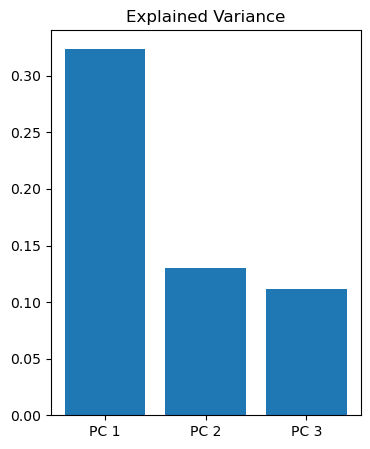

In [21]:
plt.figure(figsize=(4,5))
plt.bar(
    x=['PC 1', 'PC 2', 'PC 3'],
    height=ev
)
plt.title('Explained Variance')
plt.savefig('graphs/dgat/pca/ExplainedVarianceGraph.png', dpi=300, bbox_inches='tight')

## PCA - Graph

In [22]:
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

def confidence_ellipse(x, y, ax, n_std=3.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.

    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    **kwargs
        Forwarded to `~matplotlib.patches.Ellipse`

    Returns
    -------
    matplotlib.patches.Ellipse
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensional dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    # Calculating the standard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the standard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

/var/folders/s5/_kqw0_w551n9bnyrwxz4skwc0000gn/T/ipykernel_14135/1773568803.py:29: RuntimeWarning: Degrees of freedom <= 0 for slice
  cov = np.cov(x, y)


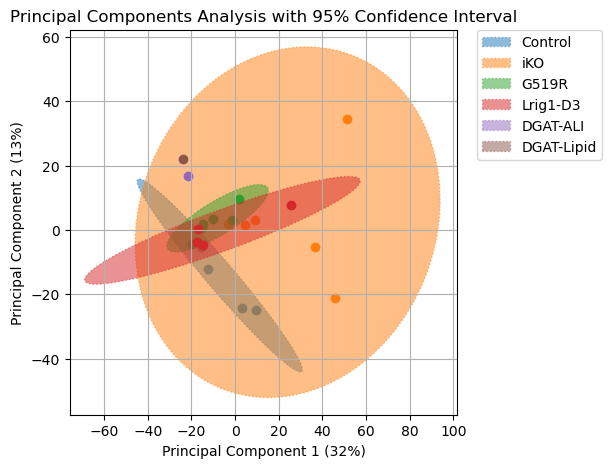

In [26]:
i = 0
fig, ax_nstd = plt.subplots(figsize=(5,5))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
'#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

for protein in df_pca['Mutation'].unique():
    x = df_pca[df_pca['Mutation'] == protein]['Principal Component 1']
    y = df_pca[df_pca['Mutation'] == protein]['Principal Component 2']
    
    ax_nstd.scatter(x, y, color=colors[i])
    confidence_ellipse(x, y, ax_nstd, n_std=3,
                   label=protein, alpha=0.5, facecolor=colors[i], edgecolor=colors[i], linestyle=':')
    i += 1


ax_nstd.grid()
ax_nstd.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
ax_nstd.set_title('Principal Components Analysis with 95% Confidence Interval')
ax_nstd.set_xlabel('Principal Component 1 (32%)')
ax_nstd.set_ylabel('Principal Component 2 (13%)')
plt.show()
ax_nstd.figure.savefig('graphs/dgat/pca/PCA.png', dpi=300, bbox_inches='tight')

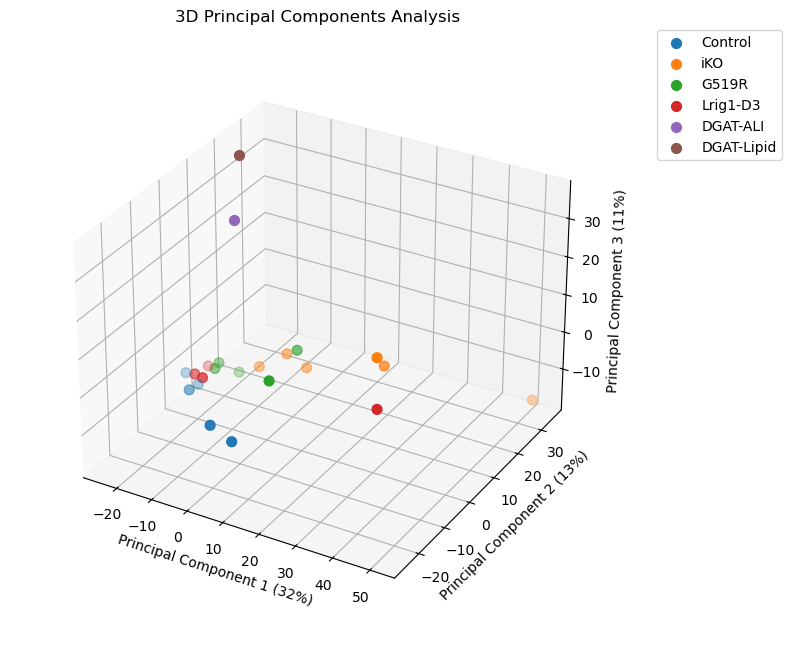

In [30]:
i = 0
fig = plt.figure(figsize=(8,8))
ax_nstd = fig.add_subplot(projection='3d')
ax_nstd.set_box_aspect(aspect=None, zoom=0.9)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
'#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

for protein in df_pca['Mutation'].unique():
    x = df_pca[df_pca['Mutation'] == protein]['Principal Component 1']
    y = df_pca[df_pca['Mutation'] == protein]['Principal Component 2']
    z = df_pca[df_pca['Mutation'] == protein]['Principal Component 3']
    
    ax_nstd.scatter(x, y, z, color=colors[i], label=protein, s=50)
#     confidence_ellipse(x, y, ax_nstd, n_std=3,
#                    label=protein, alpha=0.5, facecolor=colors[i], edgecolor=colors[i], linestyle=':')
    i += 1


ax_nstd.grid()
ax_nstd.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
ax_nstd.set_title('3D Principal Components Analysis')
ax_nstd.set_xlabel('Principal Component 1 (32%)')
ax_nstd.set_ylabel('Principal Component 2 (13%)')
ax_nstd.set_zlabel('Principal Component 3 (11%)')
plt.show()
ax_nstd.figure.savefig('graphs/dgat/pca/3D_PCA.png', dpi=300, bbox_inches='tight')